<a href="https://colab.research.google.com/github/r-meleshko/datascientest/blob/main/Module%20172%20Transfer%20Learning%20-%20Introduction%20au%20Transfer%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px"></center>

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Transfer learning </h1></center>
<hr style="border-width:2px;border-color:#75DFC1">

<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center"> 1. Concept et introduction </h3>
<hr style="border-width:2px;border-color:#75DFC1">

> Les réseaux de neurones apprennent à produire des représentations cachées qui leur permettent de "**donner du sens**" à des données complexes comme les images.
>
> > <img src = "https://assets-datascientest.s3-eu-west-1.amazonaws.com/notebooks/TP_transfer_learning_sequential_projection.png">
>
> Dans le domaine de l'apprentissage profond, **l'apprentissage par transfert** (Transfer learning) est la pratique consistant à **réutiliser** les représentations cachées produites par un **réseau entraîné sur un jeu de données difficiles** pour résoudre une **nouvelle** tâche.
>
> Par exemple, un réseau formé pour classer des images de **chiens et de chats** peut être capable de produire des représentations cachées utiles pour classer des images de **loups, renards, lions et léopards**.
>
> Un autre exemple serait de réutiliser un réseau entraîné à **traduire du français au portugais** et d'utiliser ses représentations cachées pour **traduire du français à l'espagnol**.
>
> > Le principal avantage de l'apprentissage par transfert est qu'il nous permet de nous entraîner sur des **jeux de données plus petits**, puisqu'une grande partie de l'entraînement du réseau a déjà été effectuée sur une tâche similaire au préalable.

<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center"> 2. Transfer learning pour les données images</h3>
<hr style="border-width:2px;border-color:#75DFC1">

> Les réseaux pour les données d'image qui sont transférés d'une tâche à une autre sont souvent d'abord entraînés sur le jeu de données **[ImageNet](https://en.wikipedia.org/wiki/ImageNet)**.
>
> Ce jeu de données est le **plus grand** jeu de données d'images étiquetées et contient environ **1 million d'images** de **1000 classes d'objets**. Cependant, le jeu de données ImageNet a continué à s'étendre au fil des ans et compte maintenant plus de 14 millions d'images de plus de 20 000 classes d'objets.
>
> Ce jeu de données est souvent utilisé comme référence pour mesurer les performances de l'état de l'art dans le domaine de la classification d'images.
>
> Grâce à la générosité des chercheurs du monde entier, la grande majorité des réseaux qui ont obtenu des résultats de pointe sur la base de données Imagenet sont **gratuitement disponibles pour que chacun** puisse les utiliser dans ses applications.
>
> Plus important encore, la complexité de la tâche sur laquelle ces modèles ont été entraînés est telle que **leurs représentations cachées peuvent être réutilisées pour des tâches de Computer vision très différentes et rester très performantes**.
>
> Pour la prochaine tâche d'entraînement, nous utiliserons l'architecture **VGG16** proposée par des chercheurs de l'Université d'Oxford, qui a obtenu **92,7 % de précision dans le top 5 des tests** (top 5 signifie que la catégorie correcte est parmi les 5 classes prédites).
>
> Cette architecture est construite sur les mêmes blocs de construction que nous avons utilisés dans les exercices précédents :
>
> * Couches **Convolution 2D** .
> * Couches de **Max-Pooling**.
> * Couches **Denses**.
>
>
<br> <br> <br> <br>
>
> <img src = "https://assets-datascientest.s3-eu-west-1.amazonaws.com/notebooks/TP_transfer_learning_vgg16.png" style="height:200px">
>
> <br> <br>
>
> Pour adapter le réseau VGG16 à notre tâche, nous devons :
> * 1) **Supprimer la partie de classification**.
> * 2) **Ajouter notre propre bloc de classification** et des couches supplémentaires si nous le souhaitons.
>
> <br> <br>
>
> > <img src = "https://assets-datascientest.s3-eu-west-1.amazonaws.com/notebooks/TP_transfer_learning_vgg16_transfered.png" style = "height:550px">
>
>
> <br> <br>
>
> > Pendant la formation, nous devrons nous assurer que les couches du modèle VGG16 recadré ne sont **pas mises à jour**. Cette opération est appelée **geler** les couches. Si nous devions mettre à jour ces couches, **nous pourrions perdre les connaissances acquises par le modèle** lors de la formation sur le jeu de données ImageNet.

<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center"> 3. Transfer learning avec Keras</h3>
<hr style="border-width:2px;border-color:#75DFC1">

> Le problème auquel nous allons appliquer l'apprentissage par transfert est la prédiction du type de fleur.
>
> > <img src = "https://assets-datascientest.s3-eu-west-1.amazonaws.com/notebooks/TP_transfer_learning_picasso_aubade.jpg" style = "width:400px">
>
> Nous allons utiliser un jeu de données sous forme de répertoires contenant des images, avec chaque sous dossier contenant un type particulier de fleur.

* Executer la cellule suivante pour importer les modules utiles pour la suite.

In [11]:
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd
import numpy as np
import os


* Executer la cellule suivante pour afficher les répertoires qui contiennent les données.
* Quel est le nombre de classes disponibles ?

In [12]:
!wget https://assets-datascientest.s3.eu-west-1.amazonaws.com/flowers.zip
!unzip flowers.zip

--2023-10-10 18:55:51--  https://assets-datascientest.s3.eu-west-1.amazonaws.com/flowers.zip
Resolving assets-datascientest.s3.eu-west-1.amazonaws.com (assets-datascientest.s3.eu-west-1.amazonaws.com)... 3.5.68.103, 52.218.84.11, 52.218.61.144, ...
Connecting to assets-datascientest.s3.eu-west-1.amazonaws.com (assets-datascientest.s3.eu-west-1.amazonaws.com)|3.5.68.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235741493 (225M) [application/zip]
Saving to: ‘flowers.zip.3’

flowers.zip.3       100%[===================>] 224.82M  21.9MB/s    in 11s     

2023-10-10 18:56:02 (20.1 MB/s) - ‘flowers.zip.3’ saved [235741493/235741493]

Archive:  flowers.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
os.listdir('flowers/')

['dandelion', 'tulip', 'sunflower', 'rose', 'daisy']

> Nous avons 5 classes différentes réparties entre ces répertoires.
>
> Nous allons voir par la suite comment extraire les données de ces répertoires.
>
* Executer la cellule suivante pour afficher un exemple d'image.

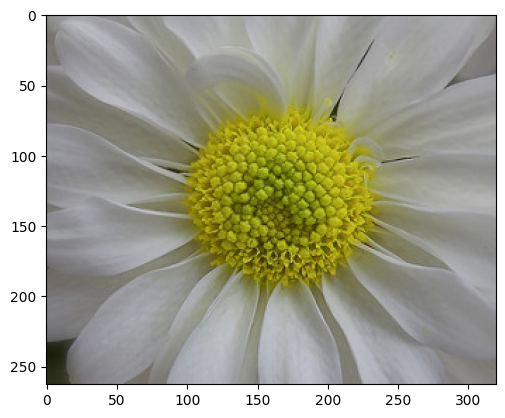

In [14]:
img = plt.imread('flowers/daisy/100080576_f52e8ee070_n.jpg')
plt.imshow(img)

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center" > Générateur de données </h2>
<hr style="border-width:2px;border-color:#75DFC1">

> L'un des meilleurs moyens d'améliorer la performance d'un modèle de Deeplearning consiste à ajouter davantage de données à l'ensemble d'entraînement. **Dans le cadre des images**, la génération de nouvelles données peuvent être faite en appliquant des transformations géométriques sur nos images (zoom, rotation, redimensionnement, changement de la luminosité ...) originales.
>
><img src="https://datascientest.fr/train/assets/python_keras_picasso_augmentation.png" style="width:700px">
>
> Les générateurs de données permettent de charger les images lorsque le réseau en a besoin, et de leur appliquer des transformations différentes (rotation, zoom, décalage, ...) pour chaque iteration. Cette approche permet d'augmenter notre jeu de données et d'éviter au maximum le sur-apprentissage.
>
>La fonction [`ImageDataGenerator`](https://keras.io/preprocessing/image/)  de la classe **keras.preprocessing.image** génère des lots de données d’images avec une augmentation des données en temps réel (transformation). Cette fonction a notamment comme arguments :
>>* **preprocessing_function**: la fonction sera exécutée une fois l'image redimensionnée et augmentée. Elle va permettre de prétraiter les images.
>>* **rotation_range**: Plage de degrés pour la rotation aléatoire de l'image.
>>* **width_shift_range**: plage pour la translation horizontale de l'image. Si l'argument est inférieur à 1, l'unité de la plage est une fraction de la largeur de l'image. Sinon, l'unité est en pixel.
>>* **height_shift_range**: plage pour la translation verticale de l'image. Si l'argument est inférieur à 1, l'unité de la plage est une fraction de la largeur de l'image. Sinon, l'unité est en pixel.
>>* **brightness_range**: Tuple ou liste de deux floats. Plage de sélection d'une valeur de décalage de luminosité.
>* **zoom_range**: Plage de zoom aléatoire. L'argument peut être soit un float ou une liste [inférieur, supérieur].
>>* **horizontal_flip**: si True retourne aléatoirement ($p = \frac{1}{2}$) l'image horizontalement.
>>* **vertical_flip**: si True retourner aléatoirement ($p = \frac{1}{2}$) l'image verticalement.
>
> Enfin nous allons récuperer les données des dossiers à l'aide de `flow_from_directory` appliquée au générateur.
>
> Afin d'avoir un entraînement rapide, nous allons appliquer un minimum de transformations.

* Implémenter sous le nom **train_generator** un générateur d'image où il faut appliquer :
  * Un split de validation de taux 20% `validation_split = 0.2`
  * une fonction de prétraitement du modèle VGG16 : `preprocessing_function = preprocess_input`.

* A l'aide de la méthode `flow_from_directory` du générateur, créer deux objets `traingen` et `validgen` en précisant:
  * Le chemin vers les données `train_data_dir`
  * (224,224) en `target_size`
  * categorical en `class_mode` pour préciser que la nature de la sortie
  * Respectivement training et validation pour les deux générateurs dans `subset`
  * 32 en `batch_size` pour batcher au préalable les données.
  * True dans `shuffle` pour mélanger les données.

In [15]:
train_data_dir = 'flowers/'

train_generator = ImageDataGenerator(validation_split=0.2,
                                     preprocessing_function=preprocess_input)

BATCH_SIZE = 32


traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               subset='training',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True)

validgen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True)

Found 3462 images belonging to 5 classes.
Found 861 images belonging to 5 classes.


> Les modèles existants (VGG, ResNet, ...) sont composés de deux grandes parties. La première est un ensemble de convolution permettant l'extraction des features de l'image. La seconde est une succession de dense layer qui a pour but de classifier.
>
> Le **nouveau problème de classification** doit être assez semblable avec le jeu de données utilisé pour le pré-entrainement. Dans ce cas, nous allons initialiser les poids de la partie d'extraction de features de notre modèle par les poids du modèle pré-entrainé. Les couches de la partie de classification seront remplacées et initialisées de manière aléatoire.
>
> Lors du début de l'apprentissage, il est nécéssaire de "freezer" (bloquer) les poids de la partie pré-entrainée puisqu'ils sont proches des poids optimaux. Puis, au courant de l'entraînement, on peut "unfreeze" les couches pour affiner les poids du modèle :
>

## Modèle
> La fonction `VGG16` de la classe **keras.applications.vgg16** permet de charger un modèle VGG16. Cette fonction a notamment comme argument :
* **include_top**: ajouter les couches denses de classification.
* **weights**: si None, les poids sont initialisés de manière aléatoire. Et si **'imagenet'**, les poids sont initialisés au poids de ImageNet.
>
> Un exemple pour créer un modèle  VGG16 et "freezer" ses couches:
```
base_model = VGG16(weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable = False    
model = Sequential()
model.add(base_model)
```
>
><img src="https://datascientest.fr/train/assets/python_keras_picasso_model.png" style="width:800px">

* Instancier un modèle VGG16 que vous nommerez `base_model`. (Ne pas oublier de préciser le bon input shape)
* Geler les couches du modèle.
* L'ajouter à un modèle `Sequential`

In [16]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Sequential



shape = (224, 224, 3)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=shape)
base_model.trainable = False

model = Sequential()

model.add(base_model)

> Nous allons ajouter maintenant la partie classificateur qui est spécifique à notre application.
>
* Ajouter la couche Flatten pour vectoriser les features.
* Ajouter une couche dense de 128 neurones avec `relu` en fonction d'activation.
* Ajouter une couche Dropout de taux 20%.
* Ajouter une couche dense à 5 neurones et la fonction d'activation `softmax`.

In [17]:
from tensorflow.keras.layers import Flatten, Dense, Dropout



model.add(Flatten(name="flatten"))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(5, activation='softmax'))

* Compiler le modèle avec les bons paramètres.
* Afficher un summary du modèle, que remarquez vous ?

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 17926725 (68.39 MB)
Trainable params: 3212037 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


> Le nombre de paramètres entraînables et non entraînables sont différents.
>
> Ceci montre bien que des couches ont été gelées.
>
* Entraîner le modèle sur les données d'entraînement `traingen`.
     * Préciser 5 époques.
     * `validgen` pour validation_data

In [20]:
model_history = model.fit(traingen,
                            epochs=5,
                            validation_data=validgen)

Epoch 1/5
109/109 [==============================] - 22s 185ms/step - loss: 3.2747 - accuracy: 0.7013 - val_loss: 0.8862 - val_accuracy: 0.7747
Epoch 2/5
109/109 [==============================] - 17s 157ms/step - loss: 0.4673 - accuracy: 0.8559 - val_loss: 0.8661 - val_accuracy: 0.7991
Epoch 3/5
109/109 [==============================] - 18s 164ms/step - loss: 0.3596 - accuracy: 0.8977 - val_loss: 0.8698 - val_accuracy: 0.8188
Epoch 4/5
109/109 [==============================] - 20s 179ms/step - loss: 0.2587 - accuracy: 0.9171 - val_loss: 0.8100 - val_accuracy: 0.8223
Epoch 5/5
109/109 [==============================] - 18s 160ms/step - loss: 0.2691 - accuracy: 0.9252 - val_loss: 0.7954 - val_accuracy: 0.8351


 * Afficher la courbe d'évolution de la perte pour les données d'entraînement et de validation.
 * Afficher la courbe d'évolution de la métrique pour les données d'entraînement et de validation..

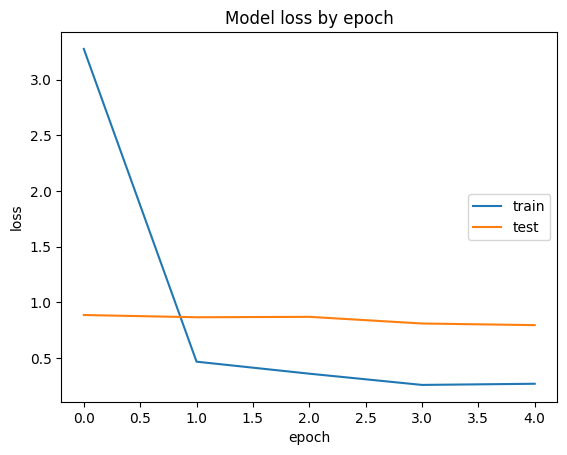

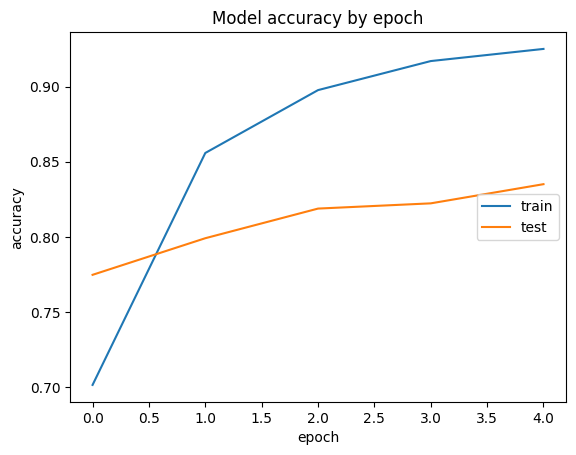

In [21]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()